Wilders smoothing: https://www.tradingtechnologies.com/xtrader-help/x-study/technical-indicator-definitions/welles-wilders-smoothing-average-wws/

Market: S&P 500

Define the trend: S&P 500 above the 200Day MA

Entry: 10-period RSI below 30 (buy on the next day's open)

Exit: 10-period RSI above 40 or after 10 trading days (sell on the next day's open)

In [1]:
import yfinance as yf
import pandas as pd
pd.options.mode.chained_assignment = None
df = yf.download('^GSPC',start='1996-01-01',end='2021-06-26')

[*********************100%***********************]  1 of 1 completed


In [2]:
df = pd.DataFrame(df)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-02,615.929993,620.739990,613.169983,620.729980,620.729980,364180000
1996-01-03,620.729980,623.250000,619.559998,621.320007,621.320007,468950000
1996-01-04,621.320007,624.489990,613.960022,617.700012,617.700012,512580000
1996-01-05,617.700012,617.700012,612.020020,616.710022,616.710022,437110000
1996-01-08,616.710022,618.460022,616.489990,618.460022,618.460022,130360000
...,...,...,...,...,...,...
2021-06-21,4173.399902,4226.240234,4173.399902,4224.790039,4224.790039,3391740000
2021-06-22,4224.609863,4255.839844,4217.270020,4246.439941,4246.439941,3208760000
2021-06-23,4249.270020,4256.600098,4241.430176,4241.839844,4241.839844,3172440000


In [3]:
df['MA200'] = df['Adj Close'].rolling(window=200).mean()

In [4]:
df

,Open,High,Low,Close,Adj Close,Volume,MA200
Date,,,,,,,
1996-01-02,615.929993,620.739990,613.169983,620.729980,620.729980,364180000,NaN
1996-01-03,620.729980,623.250000,619.559998,621.320007,621.320007,468950000,NaN
1996-01-04,621.320007,624.489990,613.960022,617.700012,617.700012,512580000,NaN
1996-01-05,617.700012,617.700012,612.020020,616.710022,616.710022,437110000,NaN
1996-01-08,616.710022,618.460022,616.489990,618.460022,618.460022,130360000,NaN
...,...,...,...,...,...,...,...
2021-06-21,4173.399902,4226.240234,4173.399902,4224.790039,4224.790039,3391740000,3802.588159
2021-06-22,4224.609863,4255.839844,4217.270020,4246.439941,4246.439941,3208760000,3806.545059
2021-06-23,4249.270020,4256.600098,4241.430176,4241.839844,4241.839844,3172440000,3810.619458


In [5]:
df = df.dropna()

In [6]:
import matplotlib.pyplot as plt

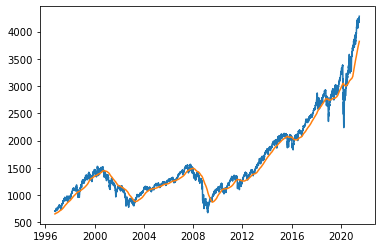

In [7]:
plt.plot(df['Adj Close'])
plt.plot(df['MA200'])
plt.show()

In [8]:
#daily return for calculating RSI
df['Price Change'] = df['Adj Close'].pct_change()
df = df.dropna()

In [9]:
df['Positive'] = df['Price Change'].apply(lambda x: x if x>0 else 0)
df['Negative'] = df['Price Change'].apply(lambda x: abs(x) if x<0 else 0)

In [10]:
#we use wilder smoothing method in a exponential moving average way
#becasue python have ema functions so we express wsm's alpha in ema's alpha (1/10->2/1+19)
df['average gain'] = df['Positive'].ewm(span=19).mean()
df['average loss'] = df['Negative'].ewm(span=19).mean()

In [11]:
df =df.dropna()

In [12]:
df['RS'] = (df['average gain']/df['average loss'])
df['RSI'] = (df['RS']).apply(lambda x: 100-(100/(x+1)))

In [13]:
df.loc[(df['Adj Close']>df['MA200'])&(df['RSI']<30),'Buy']='Yes'
df.loc[(df['Adj Close']<df['MA200'])|(df['RSI']>30),'Buy']='No'

In [14]:
#df = df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,MA200,Price Change,Positive,Negative,average gain,average loss,RS,RSI,Buy
Date,,,,,,,,,,,,,,,
1996-10-15,703.539978,708.070007,699.070007,702.570007,702.570007,458980000,654.546501,-0.001379,0.000000,0.001379,0.000000,0.001379,0.000000,0.000000,Yes
1996-10-16,702.570007,704.419983,699.150024,704.409973,704.409973,441410000,654.961950,0.002619,0.002619,0.000000,0.001378,0.000653,2.110609,67.851955,No
1996-10-17,705.000000,708.520020,704.760010,706.989990,706.989990,478550000,655.408400,0.003663,0.003663,0.000000,0.002221,0.000412,5.390370,84.351455,No
1996-10-18,706.989990,711.039978,706.109985,710.820007,710.820007,473020000,655.878950,0.005417,0.005417,0.000000,0.003151,0.000292,10.780387,91.511314,No
1996-10-21,710.820007,714.099976,707.710022,709.849976,709.849976,414630000,656.335900,-0.001365,0.000000,0.001365,0.002381,0.000554,4.297298,81.122453,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-21,4173.399902,4226.240234,4173.399902,4224.790039,4224.790039,3391740000,3802.588159,0.014002,0.014002,0.000000,0.002816,0.002423,1.162194,53.750682,No
2021-06-22,4224.609863,4255.839844,4217.270020,4246.439941,4246.439941,3208760000,3806.545059,0.005124,0.005124,0.000000,0.003047,0.002181,1.397199,58.284641,No
2021-06-23,4249.270020,4256.600098,4241.430176,4241.839844,4241.839844,3172440000,3810.619458,-0.001083,0.000000,0.001083,0.002742,0.002071,1.324110,56.972778,No


In [15]:
#Backtesting
PandL = []

for i in range(len(df)-12): #limit the length to prevent error
     if 'Yes' in df['Buy'].iloc[i]:
            for j in range(1,11):
                if df['RSI'].iloc[i+j]>40:
                    PandL.append(df['Open'].iloc[i+j+1]-df['Open'].iloc[i+1])
                    break
                elif j == 10:
                    PnL.append(df['Open'].iloc[i+j+1] - df['Open'].iloc[i+1])
                    

In [16]:
PandL

[2.42999267578125,
 4.239990234375,
 10.55999755859375,
 9.0,
 6.47998046875,
 16.010009765625,
 15.79998779296875,
 17.0699462890625,
 44.8599853515625,
 11.550048828125,
 2.239990234375,
 14.6900634765625,
 20.3599853515625,
 22.35009765625,
 27.3900146484375,
 29.8800048828125,
 46.25,
 34.2999267578125,
 16.969970703125,
 6.4400634765625,
 9.7000732421875,
 8.8800048828125,
 9.989990234375,
 16.050048828125,
 2.4599609375,
 10.89990234375,
 5.679931640625,
 10.64990234375,
 14.2999267578125,
 3.25,
 -1.27001953125,
 14.780029296875,
 27.8299560546875,
 8.68994140625,
 26.780029296875,
 29.3499755859375,
 34.1199951171875,
 20.0400390625,
 1.5599365234375,
 3.239990234375,
 8.239990234375,
 16.5599365234375,
 15.6500244140625,
 28.6300048828125,
 -7.1099853515625,
 0.469970703125,
 6.4300537109375,
 26.199951171875,
 35.52001953125,
 13.1099853515625,
 14.8900146484375,
 7.8800048828125,
 13.7099609375,
 32.1900634765625,
 3.6300048828125,
 6.81005859375,
 23.080078125,
 32.27001953